In [1]:
# Loading packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Loading dataset
df_dummy = pd.read_csv('df_dummy.csv')
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((630, 23), (112, 23), (630, 1), (112, 1))

In [3]:
# Configuring settings to display all the rows and columns
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [4]:
df_dummy.head()

,Rating,hourly,Provided_Salary,Average_Salary_Estimate,same_state,company_age,python,excel,sas,spark,tableau,aws,big data,R_lang,competitor_counts,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Construction,Industry_Consulting,Industry_Consumer Product Rental,Industry_Consumer Products Manufacturing,"Industry_Department, Clothing, & Shoe Stores",Industry_Education Training Services,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Farm Support Services,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_Financial Transaction Processing,Industry_Food & Beverage Manufacturing,Industry_Gambling,Industry_Gas Stations,Industry_Health Care Products Manufacturing,Industry_Health Care Services & Hospitals,"Industry_Health, Beauty, & Fitness",Industry_IT Services,Industry_Industrial Manufacturing,Industry_Insurance Agencies & Brokerages,Industry_Insurance Carriers,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_K-12 Education,Industry_Lending,Industry_Logistics & Supply Chain,Industry_Metals Brokers,Industry_Mining,Industry_Motion Picture Production & Distribution,Industry_Other Retail Stores,Industry_Real Estate,Industry_Religious Organizations,Industry_Research & Development,Industry_Security Services,Industry_Social Assistance,Industry_Sporting Goods Stores,Industry_Staffing & Outsourcing,Industry_Stock Exchanges,Industry_TV Broadcast & Cable Networks,Industry_Telecommunications Manufacturing,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Industry_Transportation Management,Industry_Travel Agencies,Industry_Trucking,Industry_Video Games,Industry_Wholesale,Sector_Aerospace & Defense,Sector_Agriculture & Forestry,"Sector_Arts, Entertainment & Recreation",Sector_Biotech & Pharmaceuticals,Sector_Business Services,"Sector_Construction, Repair & Maintenance",Sector_Consumer Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics,Sector_Travel & Tourism,Sector_unknown,Revenue_$1 to $5 million (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$5 to $10 million (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,company_txt_1904lab,company_txt_23andM,company_txt_7Park Dat,company_txt_<intent,company_txt_ALIN,company_txt_AVANAD,company_txt_AXION Healthcare Solution,company_txt_Acceleron Pharm,company_txt_Accuride Internationa,company_txt_Acuity Insuranc,company_txt_Adob,company_txt_Advanced BioScience Laboratorie,company_txt_Affinity Solution,company_txt_Agios Pharmaceutical,company_txt_Alignment Healthcar,company_txt_Alliance Source Testin,company_txt_AmeriHealth Carita,company_txt_American Axle & Manufacturin,company_txt_Ameritas Life Insurance Cor,company_txt_Amroc,company_txt_Applied Information Science,company_txt_Applied Research Laboratorie,company_txt_Arbella Insuranc,company_txt_Argo Group U,company_txt_Associated Banc-Cor,company_txt_Associated Electric Cooperativ,company_txt_Assuran

In [5]:
X_train.head()

,Rating,Industry,Sector,hourly,Revenue,Size,Provided_Salary,company_txt,job_state,same_state,company_age,python,excel,sas,spark,tableau,aws,big data,R_lang,ownership,job_title,seniority,competitor_counts
0,13.958948,8,9,0,6,1,0,0,0,0,2.094612,0,1,0,0,0,0,0,0,2,3,3,0
1,21.937426,0,0,1,2,1,0,0,0,0,6.661203,0,0,0,0,0,0,0,0,0,3,2,0
2,30.619308,1,2,0,6,6,0,0,0,0,0.000000,0,1,0,0,0,1,0,0,0,2,2,0
3,33.919176,9,8,0,6,4,0,0,2,0,2.094612,1,0,0,1,0,0,1,0,2,2,2,0
4,21.937426,1,4,0,9,6,0,0,0,0,8.705207,0,1,0,0,0,0,0,0,4,3,2,0


In [6]:
X = df_dummy.drop('Average_Salary_Estimate', axis=1)
y = df_dummy['Average_Salary_Estimate']

In [7]:
# Multiple linear regression 
import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Average_Salary_Estimate   R-squared:                       0.928
Model:                                 OLS   Adj. R-squared:                  0.854
Method:                      Least Squares   F-statistic:                     12.49
Date:                     Mon, 08 Jun 2020   Prob (F-statistic):          3.55e-105
Time:                             14:37:57   Log-Likelihood:                -2765.0
No. Observations:                      742   AIC:                             6286.
Df Residuals:                          364   BIC:                             8028.
Df Model:                              377                                         
Covariance Type:                 nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             36.7069     15.103      2.430      0.016       7.006      66.407
Rating                                                             6.9111      1.311      5.271      0.000       4.333       9.490
hourly                                                           -29.5781      5.659     -5.227      0.000     -40.706     -18.450
Provided_Salary                                                   19.6182      5.872      3.341      0.001       8.071      31.165
same_state                                                        -7.4479      4.168     -1.787      0.075     -15.643       0.748
company_age                                                        0.0004      0.031      0.013      0.989      -0.060       0.061
python                                                             3.4605      3.209      1.078      0.282      -2.850       9.771
excel                                                             -3.6625      2.781     -1.317      0.189      -9.132       1.807
sas                                                               17.6431      4.127      4.275      0.000       9.528      25.758
spark                                                             -6.2039      4.549     -1.364      0.174     -15.150       2.742
tableau                                                            5.5232      4.349      1.270      0.205      -3.028      14.075
aws                                                               13.1650      4.502      2.924      0.004       4.311      22.019
big data                                                          -3.2151      4.594     -0.700      0.484     -12.249       5.819
R_lang                                                            14.8506      8.128      1.827      0.069      -1.133      30.835
competitor_counts                                                  0.5082      0.685      0.742      0.459      -0.838       1.855
Industry_Accounting                                                3.4420      7.245      0.475      0.635     -10.806      17.690
Industry_Advertising & Marketing                                  11.7771      5.410      2.177      0.030       1.137      22.417
Industry_Aerospace & Defense                                       4.1683      2.756      1.513      0.131      -1.251       9.588
Industry_Architectural & Engineering Services                    -24.5820      7.723     -3.183      0.002     -39.769      -9.395
Industry_Auctions & Galleries                                      9.0742      7.015      1.294      0.197      -4.721      22.869
Industry_Banks 

* We have very high r square value that means the model is overfitted
* This model is more like EDA rather than a serious ML model

### 4 fold cross validation :
* Lasso Regression
* Random Forest Regression
* Gradient Boosting Regression

Lasso Regression 21.763224274353625


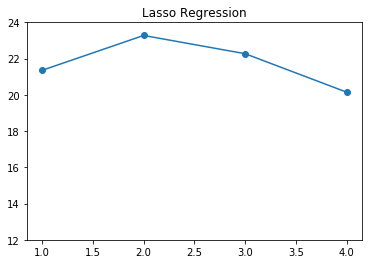

Random Forest Regression 15.437700233306378


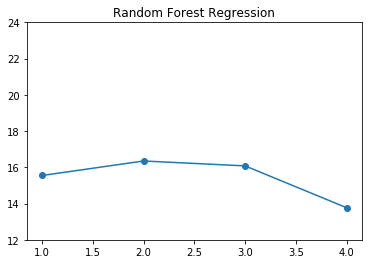

Gradient Boosting Regression 17.972583542310325


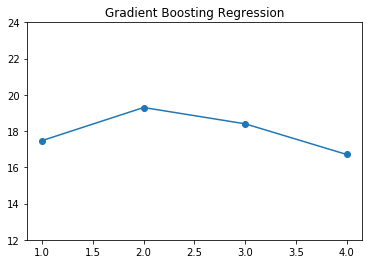

In [8]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

lm = Lasso()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

def model_perf(model_name, estimator, cv):
    k = np.absolute(cross_val_score(estimator, X_train, y_train['Average_Salary_Estimate'].ravel(),
                                    cv=cv, scoring='neg_mean_absolute_error'))
    print(model_name, np.mean(k))
    plt.plot(np.arange(1,5),k,marker='o')
    plt.title(model_name)
    plt.ylim(12,24)
    plt.show()
    
for ml, est in zip(['Lasso Regression', 'Random Forest Regression', 'Gradient Boosting Regression'], [lm, rfr, gbr]):
    model_perf(ml, est, 4)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error

# Gradient boost regressor
gbr = GradientBoostingRegressor(random_state = 101)
param_gbr = dict(n_estimators = np.arange(100,210,10),
                 learning_rate = [0.05,0.1],
                 subsample = [0.8,0.9,1],
                 criterion = ['mse','mae'], 
                 max_depth = [3,4,5,6],
                 max_features = ['auto', 'sqrt', 'log2']) 


# Random forest regressor
rfr = RandomForestRegressor(random_state = 101)
param_rfr = dict(n_estimators = np.arange(100,210,10),
                 bootstrap = [True,False],
                 criterion = ['mse','mae'],
                 max_depth = [3,4,5,6],
                 max_features = ['auto', 'sqrt', 'log2']) 


# Lasso regression
lm = Lasso(random_state = 101)
param_lm = dict(alpha = np.arange(0.01,1.01,0.01))



def grid_search(estimator, param_grid):
    gscv = GridSearchCV(estimator, param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, verbose=1)
    
    gscv.fit(X_train, y_train)
    
    print('ESTIMATOR ->', gscv.best_estimator_,'\n')
    print('BEST PARAMETERS ->',gscv.best_params_,'\n')
    print('BEST SCORE->',np.absolute(gscv.best_score_),'\n')
    print('Mean absolute error :',mean_absolute_error(y_test,gscv.predict(X_test)))
    print('R squared score of train dataset :',r2_score(y_train,gscv.predict(X_train)))
    print('R squared score of test dataset :',r2_score(y_test,gscv.predict(X_test)),'\n')
 


for model, parameters in zip([lm, rfr, gbr], [param_lm, param_rfr, param_gbr]):
    grid_search(model, parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ESTIMATOR -> Lasso(alpha=0.21000000000000002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=101,
      selection='cyclic', tol=0.0001, warm_start=False) 

BEST PARAMETERS -> {'alpha': 0.21000000000000002} 

BEST SCORE-> 20.98363701085603 

Mean absolute error : 18.142727099617108
R squared score of train dataset : 0.5015528906197237
R squared score of test dataset : 0.501386207928937 

Fitting 3 folds for each of 528 candidates, totalling 1584 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 1584 out of 1584 | elapsed: 27.3min finished
C:\Users\prash\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


ESTIMATOR -> RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=101, verbose=0, warm_start=False) 

BEST PARAMETERS -> {'bootstrap': True, 'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 200} 

BEST SCORE-> 18.988702992064436 

Mean absolute error : 15.869278563807175
R squared score of train dataset : 0.7544801516321868
R squared score of test dataset : 0.5413630641978382 

Fitting 3 folds for each of 1584 candidates, totalling 4752 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 58.9min
[Parallel(n_jobs=-1)]: Done 4752 out of 4752 | elapsed: 79.2min finished
C:\Users\prash\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ESTIMATOR -> GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=101, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

BEST PARAMETERS -> {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.9} 

BEST SCORE-> 13.223224241248891 

Mean absolute error : 11.014256779405036
R squared score of train dataset : 0.983979617851349
R squared score of test dataset : 0.6685036254005619 



* Lasso regression performed very poor
* Random forest is somewhat ok with the performance
* We can see overfitting of the gradient boost model

Gradient Boosting Regressor 

Number of trees : 50
Mean absolute error : 14.328738882827386
R squared score of train dataset : 0.8400370201938834
R squared score of test dataset : 0.6153266684504188 

Number of trees : 60
Mean absolute error : 14.088283610322534
R squared score of train dataset : 0.8639480479467536
R squared score of test dataset : 0.6093960682408548 

Number of trees : 70
Mean absolute error : 13.94460067046396
R squared score of train dataset : 0.885573102753823
R squared score of test dataset : 0.6125989227744197 

Number of trees : 80
Mean absolute error : 13.56012394609858
R squared score of train dataset : 0.9024360499365324
R squared score of test dataset : 0.6163778088839397 

Number of trees : 90
Mean absolute error : 13.163467256505896
R squared score of train dataset : 0.9134088380457633
R squared score of test dataset : 0.6237806679772142 

Number of trees : 100
Mean absolute error : 12.855455195053668
R squared score of train dataset : 0.9218429744947969
R

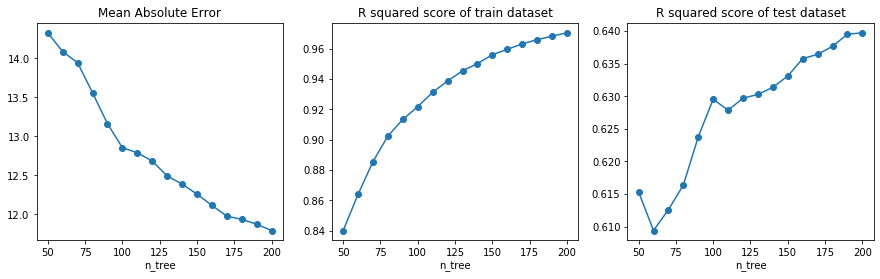

In [10]:
# Let's further check gradient boost with hypertuned parameters
print('Gradient Boosting Regressor', '\n')

mae=[]
r2_score_test=[]
r2_score_train=[]

for n_tree in np.arange(50,210,10):
    model = GradientBoostingRegressor(n_estimators = n_tree,
                                      learning_rate = 0.1,
                                      subsample = 0.9,
                                      criterion = 'mse', 
                                      max_depth = 5,
                                      max_features = 'sqrt',
                                      random_state = 101)
    
    model.fit(X_train, y_train['Average_Salary_Estimate'].ravel())
    
    print('Number of trees :', n_tree)
    print('Mean absolute error :',mean_absolute_error(y_test,model.predict(X_test)))
    print('R squared score of train dataset :',r2_score(y_train,model.predict(X_train)))
    print('R squared score of test dataset :',r2_score(y_test,model.predict(X_test)),'\n')
    
    mae.append(mean_absolute_error(y_test,model.predict(X_test)))
    r2_score_test.append(r2_score(y_test,model.predict(X_test)))
    r2_score_train.append(r2_score(y_train,model.predict(X_train)))
    
    
    
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.plot(np.arange(50,210,10), mae, marker='o')
plt.title('Mean Absolute Error')
plt.xlabel('n_tree')
  
plt.subplot(1,3,2)
plt.plot(np.arange(50,210,10), r2_score_train, marker='o')
plt.title('R squared score of train dataset')
plt.xlabel('n_tree')
    
plt.subplot(1,3,3)
plt.plot(np.arange(50,210,10), r2_score_test, marker='o')
plt.title('R squared score of test dataset')
plt.xlabel('n_tree')
plt.show()

##### Able to find out the sweet sport between high bias and high variance model in gradient boosting algorithm.
* n_estimators = 80
* criterion = 'mse'
* learning_rate = 0.1
* max_depth = 6
* max_features = 'sqrt'
* n_estimators = 200
* subsample = 0.9 

Random Forest Regressor 

Random forest, max_depth : 4


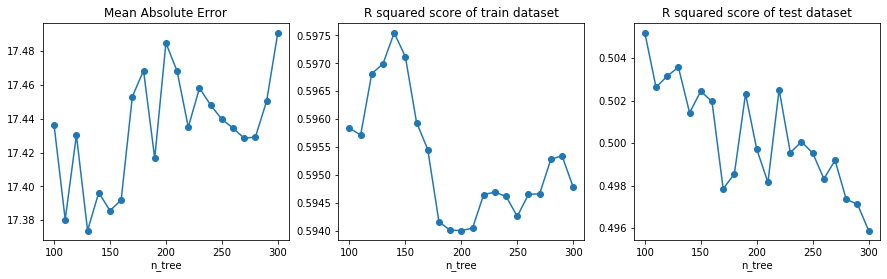

Random forest, max_depth : 5


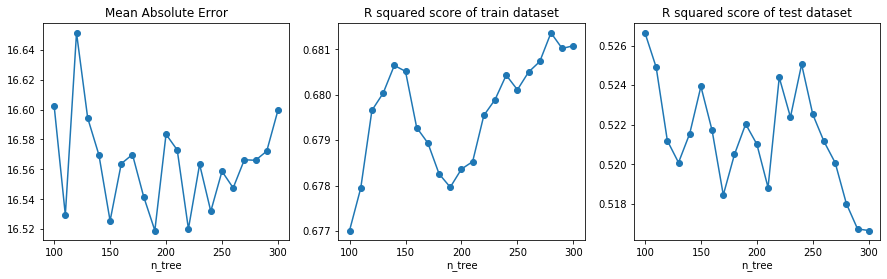

Random forest, max_depth : 6


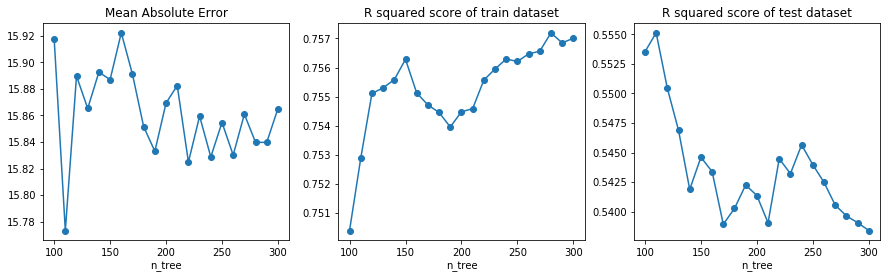

Random forest, max_depth : 7


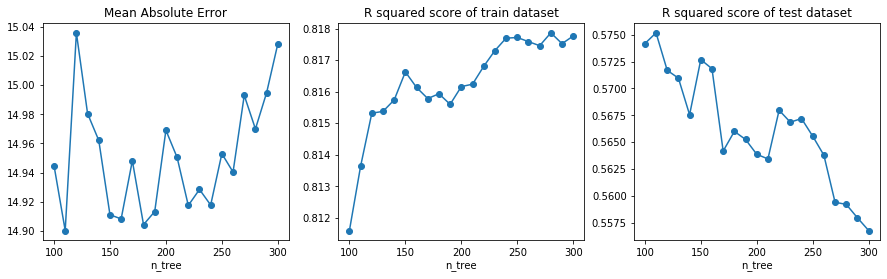

In [11]:
# Let's further check Random forest with hypertuned parameters
print('Random Forest Regressor', '\n')

for max_dpt in [4,5,6,7]:
    print('Random forest, max_depth :',max_dpt)
    mae=[]
    r2_score_test=[]
    r2_score_train=[]
    for n_tree in np.arange(100,310,10):
        model = RandomForestRegressor(n_estimators = n_tree,
                                      bootstrap = True,
                                      criterion = 'mse', 
                                      max_depth = max_dpt,
                                      max_features = 'auto',
                                      random_state = 101)
    
        model.fit(X_train, y_train['Average_Salary_Estimate'].ravel())
    
        #print('Number of trees :', n_tree)
        #print('Mean absolute error :',mean_absolute_error(y_test,model.predict(X_test)))
        #print('R squared score of train dataset :',r2_score(y_train,model.predict(X_train)))
        #print('R squared score of test dataset :',r2_score(y_test,model.predict(X_test)),'\n')
    
        mae.append(mean_absolute_error(y_test,model.predict(X_test)))
        r2_score_test.append(r2_score(y_test,model.predict(X_test)))
        r2_score_train.append(r2_score(y_train,model.predict(X_train)))
    
    plt.figure(figsize = (15,4))
    plt.subplot(1,3,1)
    plt.plot(np.arange(100,310,10), mae, marker='o')
    plt.title('Mean Absolute Error')
    plt.xlabel('n_tree')
  
    plt.subplot(1,3,2)
    plt.plot(np.arange(100,310,10), r2_score_train, marker='o')
    plt.title('n_tree')
    plt.title('R squared score of train dataset')
    plt.xlabel('n_tree')
    
    plt.subplot(1,3,3)
    plt.plot(np.arange(100,310,10), r2_score_test, marker='o')
    plt.title('R squared score of test dataset')
    plt.xlabel('n_tree')
    plt.show()

##### For every combinations of number of tree and maximum depth of trees, random forest algorithm tends to show a downfall of r squared score of test dataset as number of iteration increases.
* bootstrap = True 
* criterion = 'mse' 
* max_depth = 7
* max_features = 'auto' 
* n_estimators = 110

In [12]:
# Rebuilding the models using our findings and saving the trained model
import joblib 

# Lasso regression
lm = Lasso(alpha=0.21, random_state=101)
lm.fit(X_train, y_train['Average_Salary_Estimate'].ravel())
joblib.dump(lm, 'Lasso_reg.pkl')

# Random Forest Regression
rfr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7, max_features='auto', n_estimators=110, n_jobs=-1,
                            random_state=101) 
rfr.fit(X_train, y_train['Average_Salary_Estimate'].ravel())
joblib.dump(rfr, 'Random_Forest_reg.pkl')

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(criterion='mse', learning_rate=0.1, max_depth=6, max_features='sqrt', n_estimators=80,
                                random_state=101, subsample=0.9) 
gbr.fit(X_train, y_train['Average_Salary_Estimate'].ravel())
joblib.dump(gbr, 'Gradient_Boost_reg.pkl')

['Gradient_Boost_reg.pkl']

C:\Users\prash\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


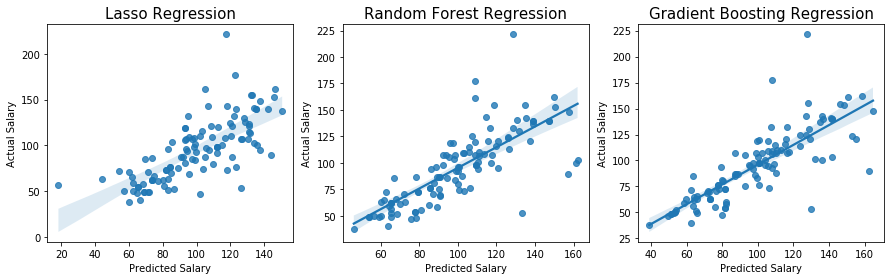

In [13]:
# loading the ML models and making prediction
import seaborn as sns

lm = joblib.load('Lasso_reg.pkl')
rfr = joblib.load('Random_Forest_reg.pkl')
gbr = joblib.load('Gradient_Boost_reg.pkl')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,4))

for ax, model, title in zip([0,1,2],
                            [lm, rfr, gbr],
                            ['Lasso Regression', 'Random Forest Regression', 'Gradient Boosting Regression']):
    sns.regplot(model.predict(X_test), y_test['Average_Salary_Estimate'].ravel(), ax=axes[ax])
    axes[ax].set_ylabel('Actual Salary')
    axes[ax].set_xlabel('Predicted Salary')
    axes[ax].set_title(title, fontdict = {'size' : 15})